In [2]:

from plot import plot_lc
from error import error_func
from platesolve import light_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('report.mplstyle')
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde

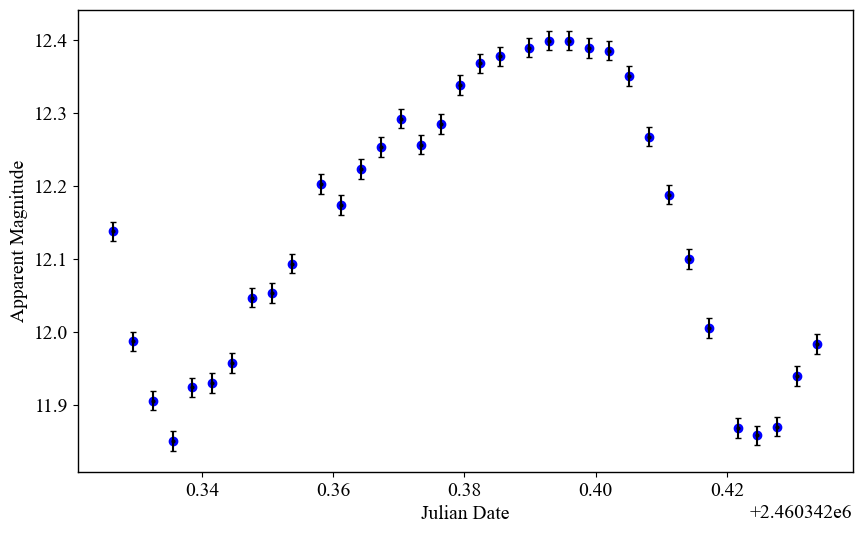

In [18]:
data = pd.read_csv('NSVS7293918_G.txt')

magnitude = data['Magnitude']
time = data['JD']
error = data['Mag_err']

plt.figure(figsize=(10, 6))
plt.scatter(time, magnitude, color='blue', marker='o')
plt.errorbar(time, magnitude, yerr=error, fmt='o', color='black', markersize=2, capsize=2)

plt.xlabel('Julian Date')
plt.ylabel('Apparent Magnitude')
plt.savefig('light_curve.pdf')
plt.show()


In [183]:
# def fitter(x):
#     if x < 0:
#         return 0
#     if x >= 0 and x <= 2460342.3525:
#         return ((((x-x_0)*10))**2)+12
#     if x > 2460342.3525 and x <= 2460342.38:
#         return ((x-x_0)*300)
#     if x > 2460342.38 and x <= 2460342.44:
#         return np.sin(x-x_0)
# time = np.sort(time)
# y_data = []
# for i in range(len(time)):
#     if i == 0:
#         x_0 = time[i]
#     y_dat = fitter(time[i])
#     y_data.append(y_dat)

In [7]:
from photometry import platesolve

platesolve('SX UMa','Chr R',False,False)

SX-UMa_LIGHT_2024-04-09T20-27-19Z_Chr-R_60s_-10.0C_W_0005.fits_c.fits
271
Solving.....Success
56 15 59.36 13 26 17.526
SX-UMa_LIGHT_2024-04-09T23-50-39Z_Chr-R_60s_-9.9C_W_0035.fits_c.fits
330
Solving..........Success
56 15 59.05 13 26 17.509
SX-UMa_LIGHT_2024-04-10T03-07-38Z_Chr-R_60s_-9.9C_E_0064.fits_c.fits
371
Solving.........Success
56 15 25.30 13 26 13.399
SX-UMa_LIGHT_2024-04-09T22-56-54Z_Chr-R_60s_-10.0C_W_0027.fits_c.fits
318
Solving.........Success
56 15 59.20 13 26 17.509
SX-UMa_LIGHT_2024-04-10T01-47-47Z_Chr-R_60s_-10.0C_E_0052.fits_c.fits
392
Solving...........Success
56 15 24.94 13 26 13.378
SX-UMa_LIGHT_2024-04-09T21-21-47Z_Chr-R_60s_-9.9C_W_0013.fits_c.fits
326
Solving...............Success
56 15 59.32 13 26 17.490
SX-UMa_LIGHT_2024-04-09T23-29-51Z_Chr-R_60s_-9.9C_W_0032.fits_c.fits
336
Solving...........Success
56 15 58.91 13 26 17.476
SX-UMa_LIGHT_2024-04-10T02-47-53Z_Chr-R_60s_-10.0C_E_0061.fits_c.fits
369
Solving..........Success
56 15 25.30 13 26 13.381
SX-UMa_LIGHT

In [8]:
from photometry import photometry

photometry('SX UMa','Chr R',9,0,False)

OSError: Cannot save file into a non-existent directory: 'airmass/R'

<Figure size 640x480 with 0 Axes>

In [36]:
x = np.linspace(0, 0.12, 1000)

# , x > 2460342.3525 & x <= 2460342.38, x > 2460342.38 & x <= 2460342.44, x > 2460342.44]            , lambda x: x-x[0]   , lambda x: np.sin((x-x[0])), lambda x: x-x[0]
y = np.piecewise(x, [(x < 0), (x >= 0) & (x <= 0.04), (x > 0.04) & (x <= 0.08), (x > 0.08) & (x <= 0.12), (x > 0.12)], 
                     [0, lambda x: ((((x)))**2), lambda x: (np.sin(x)), lambda x: np.sin(x-0), 0])


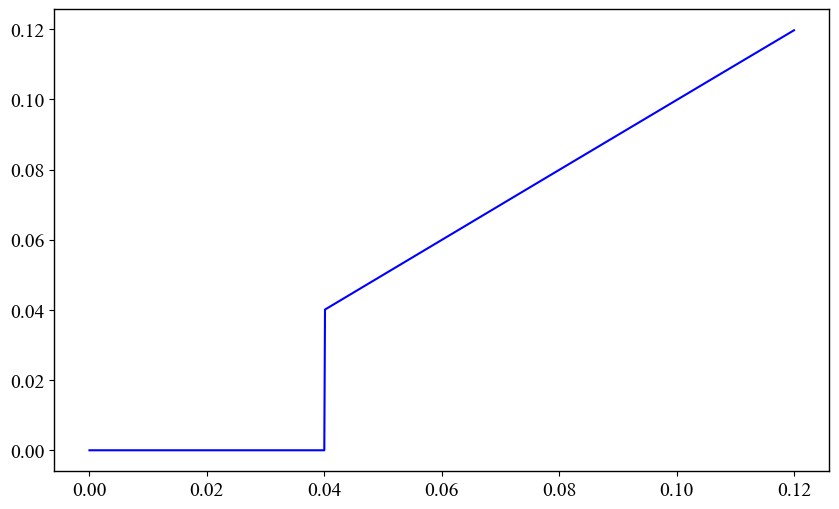

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')


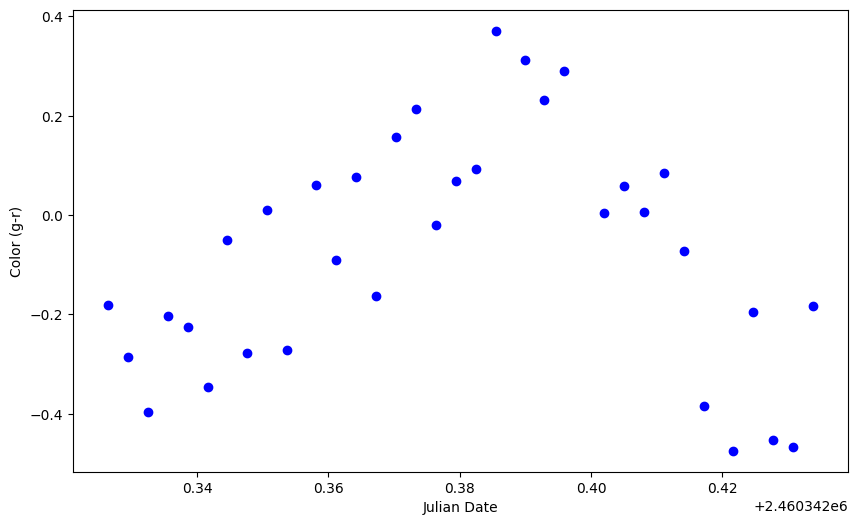

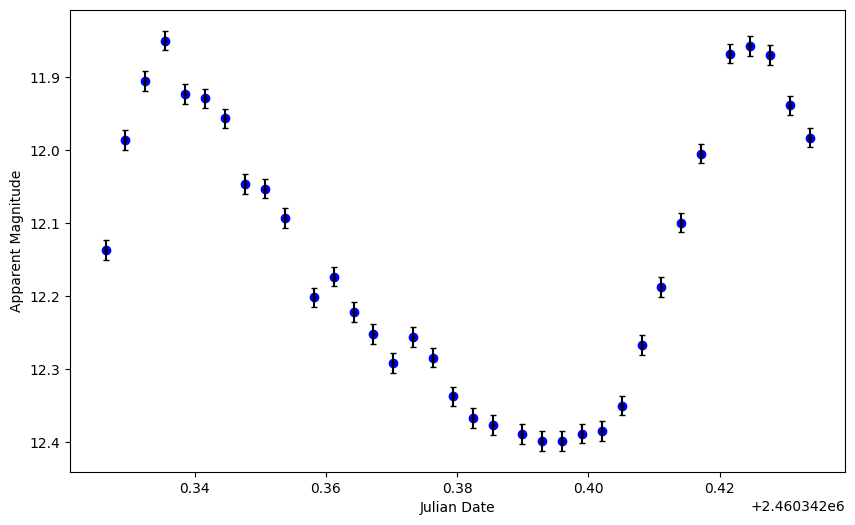

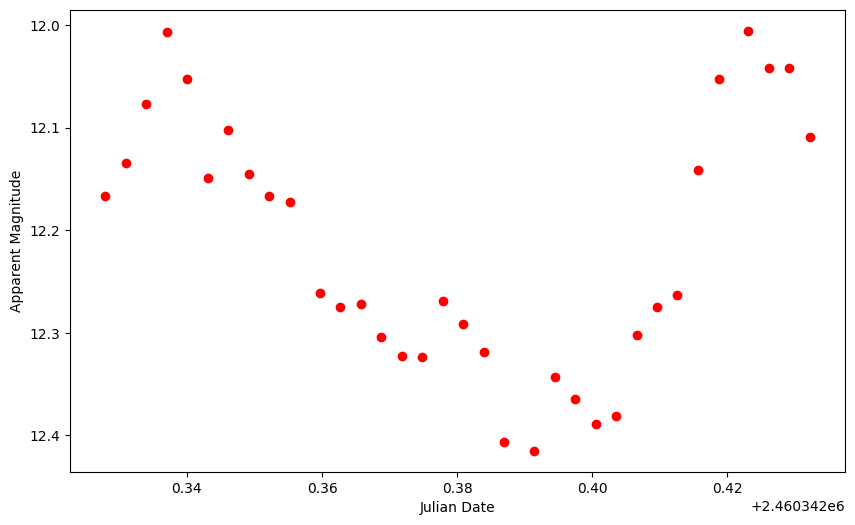

In [1]:
import numpy as np
import matplotlib.pyplot as plt
g_data = np.loadtxt('NSVS7293918_G.txt', delimiter=',', skiprows=1)
r_data = np.loadtxt('NSVS7293918_R.txt', delimiter=',', skiprows=1)

g_time = g_data[:, 0]
g_mag = g_data[:, 1]
g_err = g_data[:, 2]

r_time = r_data[:, 0]
r_mag = r_data[:, 1]



color = g_mag[0:34] - r_mag
plt.figure(figsize=(10, 6))
plt.scatter(g_time[0:34], color, color='blue', marker='o')
plt.xlabel('Julian Date')
plt.ylabel('Color (g-r)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(g_time, g_mag, color='blue', marker='o')
plt.errorbar(g_time, g_mag, yerr=g_err, fmt='o', color='black', markersize=2, capsize=2)
plt.gca().invert_yaxis()
plt.xlabel('Julian Date')
plt.ylabel('Apparent Magnitude')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(r_time, r_mag, color='red', marker='o')
plt.gca().invert_yaxis()
plt.xlabel('Julian Date')
plt.ylabel('Apparent Magnitude')
plt.show()

NSVS7293918_LIGHT_2024-02-01T21-56-22Z_Chr-G_120s_-10.0C_W_0029.fits
757
 id xcentroid ycentroid sharpness  ... sky    peak      flux        mag      
--- --------- --------- ---------- ... --- --------- --------- --------------
360 510.70403  477.0878 0.44770437 ...   0 17538.663  608.0248     -6.9598032
233 246.96102 300.13292 0.47394468 ...   0 11277.907 388.22602     -6.4727116
433 354.00466 596.97556 0.46087247 ...   0 9178.4933 319.33683     -6.2606225
485 545.26059 670.54023 0.45718825 ...   0 5571.5722 186.52055     -5.6768167
495 873.01806 682.26715 0.47261003 ...   0 4434.9056 150.17668     -5.4415062
266  321.7955 336.22427 0.45493458 ...   0 3005.7324 102.84269     -5.0304336
282 737.89144  361.5445 0.46801013 ...   0 2761.7477 92.347609     -4.9135641
490 469.32601 676.45656 0.47221354 ...   0 2795.6179 91.866753     -4.9078959
 95 76.383273 102.82214 0.44870608 ...   0 2016.3993 68.502839     -4.5892714
 97 472.36249 104.51644 0.44043355 ...   0    1633.3 55.848595     -4

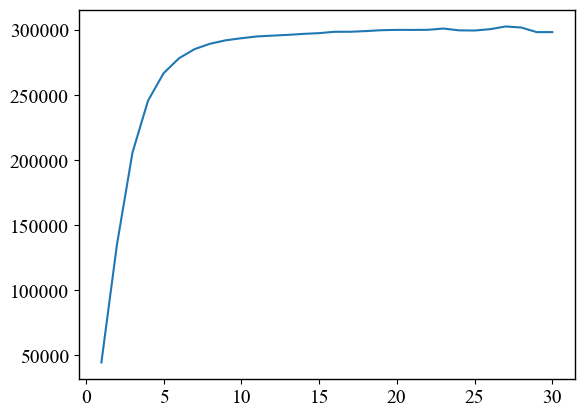

12.116196177151215
example_plate_solved.pdf
NSVS7293918_LIGHT_2024-02-01T20-57-34Z_Chr-G_120s_-10.0C_W_0016.fits
Solving........Success
12.329808554008368
NSVS7293918_LIGHT_2024-02-01T22-00-45Z_Chr-G_120s_-10.0C_W_0030.fits
Solving.....Success
12.023746050748182
NSVS7293918_LIGHT_2024-02-01T20-11-53Z_Chr-G_120s_-10.0C_W_0006.fits
Solving.....Success
11.962688362489343
NSVS7293918_LIGHT_2024-02-01T20-44-28Z_Chr-G_120s_-10.0C_W_0013.fits
Solving......Success
12.257958172051001
NSVS7293918_LIGHT_2024-02-01T19-58-46Z_Chr-G_120s_-10.0C_W_0003.fits
Solving.....Success
11.947589723930287
NSVS7293918_LIGHT_2024-02-01T21-25-47Z_Chr-G_120s_-9.9C_W_0022.fits
Solving.....Success
12.433061656115903
NSVS7293918_LIGHT_2024-02-01T21-47-39Z_Chr-G_120s_-10.0C_W_0027.fits
Solving......Success
12.309503177236508
NSVS7293918_LIGHT_2024-02-01T20-48-50Z_Chr-G_120s_-10.0C_W_0014.fits
Solving.....Success
12.293232026248921
NSVS7293918_LIGHT_2024-02-01T20-29-21Z_Chr-G_120s_-10.0C_W_0010.fits
Solving.....Success

In [4]:
jd ,mag = light_curve('NSVS7293918', 'Chr G','120s',9,True)